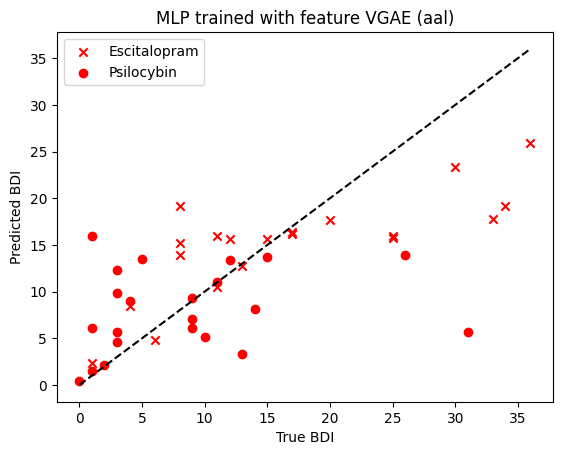

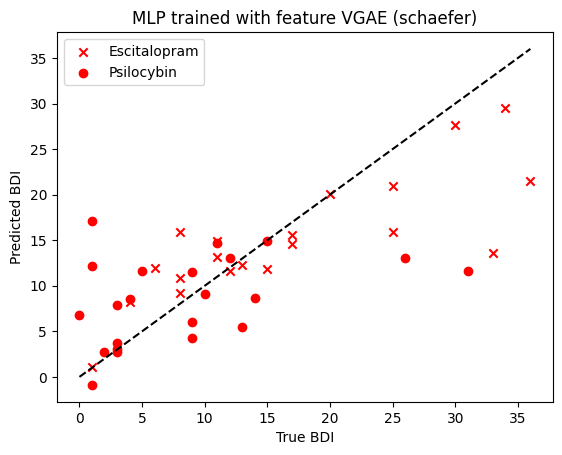

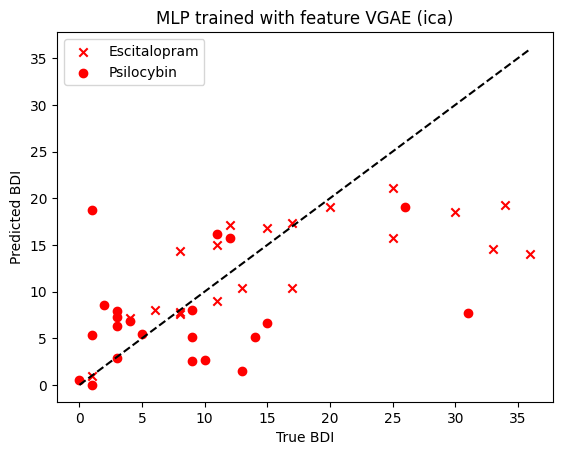

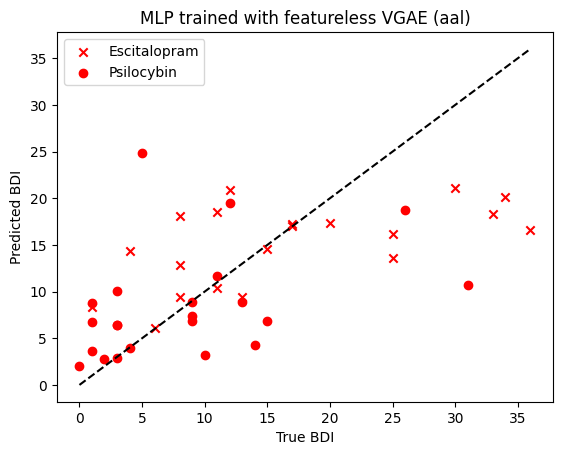

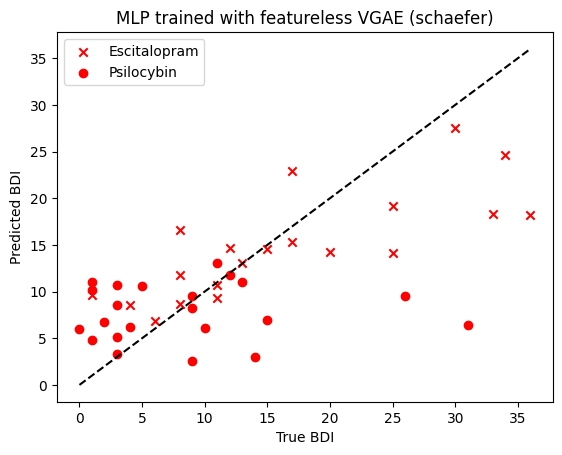

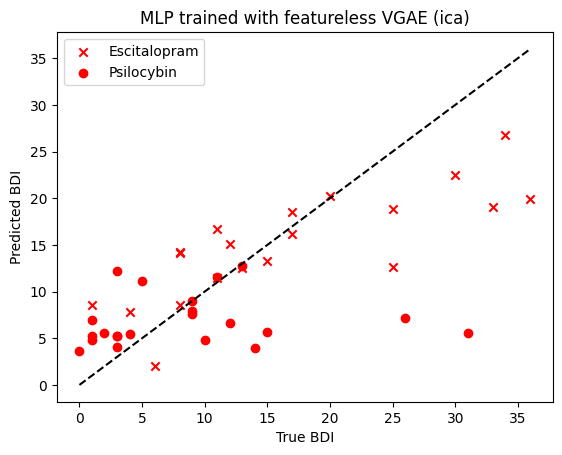

In [19]:
import matplotlib.pyplot as plt
import csv

# Specify the filename of the CSV file

for mode in ['feature', 'featureless']:
    for atlas in ['aal', 'schaefer', 'ica']:

        filename = os.path.join(root, f'{mode}-vgae-full-val-results-{atlas}.csv')
        # Initialize lists to store data
        true_values = []
        predicted_values = []
        drug_values = []

        # Read data from the CSV file
        with open(filename, 'r') as file:
            reader = csv.reader(file)
            next(reader)  # Skip the header row
            for row in reader:
                true_values.append(float(row[0]))
                predicted_values.append(float(row[1]))
                drug_values.append(float(row[2]))

        # Prepare marker colors based on drug values
        colors = ['red' if drug == 1 else 'blue' for drug in drug_values]

        # Plot the graph
        for t, p, d in zip(true_values, predicted_values, drug_values):
            marker = 'x' if d == -1 else 'o'
            plt.scatter(t, p, color='red', marker=marker)
        plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], 'k--')

        plt.xlabel('True BDI')
        plt.ylabel('Predicted BDI')
        plt.title(f'MLP trained with {mode} VGAE ({atlas})')
        plt.legend(['Escitalopram', 'Psilocybin'])
        plt.savefig(f'mlp_{mode}_{atlas}_vgae.png', bbox_inches='tight')
        plt.show()
